In [1]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
#from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display




In [2]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240822_144757.CSV"

output_folder_path = 'Analysis/Date/20240822/PM/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [3]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [4]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Calculated load value (%)', 'Engine coolant temperature (°F)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Relative throttle position (%)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Engine oil temperature (°F)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Mass air flow rate (lb/min)', 'Boost (psi)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)']


In [5]:
df=df[['Time (sec)',
       'Trip Distance (miles)',
       'Vehicle speed (MPH)',
       'Engine RPM (RPM)',
       'Boost (psi)',
       'Relative accelerator pedal position (%)',
       'Relative throttle position (%)',
       'Engine Power (hp)',
       'Engine Torque (lb•ft)',
       'Mass air flow rate (lb/min)',
       'Intake manifold absolute pressure (inHg)',
       'Ambient air temperature (°F)',
       'Intake air temperature bank 1  sensor 1 (°F)',
       'Engine oil temperature (°F)',
       'Instant fuel economy (MPG)',
       'Trip Fuel Economy (MPG)',
       'Latitude (deg)',
       'Longitude (deg)']]
df.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Relative throttle position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
0,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341880
1,0.971,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341890
2,1.971,0.000000,0.000000,0.00,0.000000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341890
3,4.974,0.001861,1.864114,1672.25,-2.030528,3.137255,6.27451,9.58649,30.108732,1.504374,25.691187,69.8,73.4,78.8,2.666155,1.836173,44.860527,-93.341896
4,5.959,0.001861,1.864114,1672.25,-2.030528,3.137255,6.27451,9.58649,30.108732,1.504374,25.691187,69.8,73.4,78.8,2.666155,1.836173,44.860490,-93.341900


In [6]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Relative throttle position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg)
0,0.000,0.000000,0.000000,0.00,0.010000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341880
1,0.971,0.000000,0.000000,0.00,0.010000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341890
2,1.971,0.000000,0.000000,0.00,0.010000,0.000000,0.00000,9.49860,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,44.860565,-93.341890
3,4.974,0.001861,1.864114,1672.25,-2.030528,3.137255,6.27451,9.58649,30.108732,1.504374,25.691187,69.8,73.4,78.8,2.666155,1.836173,44.860527,-93.341896
4,5.959,0.001861,1.864114,1672.25,-2.030528,3.137255,6.27451,9.58649,30.108732,1.504374,25.691187,69.8,73.4,78.8,2.666155,1.836173,44.860490,-93.341900


In [7]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.round({'Time (sec)': 2, 'Engine RPM (RPM)': 0, 'Engine Power (hp)': 0, 'Trip Distance (miles)':3})
    # Round columns ' Instant fuel economy (MPG)', ' Vehicle speed (MPH)' and 4 other columns (Number of decimals: 1)
    df = df.round({'Instant fuel economy (MPG)': 1, 'Vehicle speed (MPH)': 1,'Relative throttle position (%)': 1, 'Relative accelerator pedal position (%)': 1, 'Trip Fuel Economy (MPG)': 1,'Boost (psi)':1})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2,'Bearing (deg)': 2})
    # Drop columns: ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)' and 3 other columns
    df = df.drop(columns=['Relative throttle position (%)'])
    # Rename column 'Latitude (deg)' to 'latitude'
    df = df.rename(columns={'Latitude (deg)': 'latitude','Longitude (deg)': 'longitude' })
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.00,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.341880
1,0.97,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.341890
2,1.97,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.341890
3,4.97,0.002,1.9,1672.0,-2.0,3.1,10.0,30.108732,1.5,25.69,69.8,73.4,78.8,2.7,1.8,44.860527,-93.341896
4,5.96,0.002,1.9,1672.0,-2.0,3.1,10.0,30.108732,1.5,25.69,69.8,73.4,78.8,2.7,1.8,44.860490,-93.341900


In [8]:
column_list=df_clean.columns.tolist()
print(column_list)

['Time (sec)', 'Trip Distance (miles)', 'Vehicle speed (MPH)', 'Engine RPM (RPM)', 'Boost (psi)', 'Relative accelerator pedal position (%)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Mass air flow rate (lb/min)', 'Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Engine oil temperature (°F)', 'Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'latitude', 'longitude']


In [9]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.00,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.34188
1,0.97,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.34189
2,1.97,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.34189
84,85.97,0.389,0.0,768.0,-9.0,0.0,5.0,37.115120,0.49,11.52,68.0,71.6,96.8,0.0,13.2,44.862630,-93.34658
85,86.97,0.389,0.0,768.0,-8.8,0.0,5.0,37.103035,0.52,11.81,68.0,71.6,96.8,0.0,13.2,44.862630,-93.34659


In [10]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
2,1.97,0.000,0.0,0.0,0.0,0.0,9.0,0.000000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,44.860565,-93.341890
3,4.97,0.002,1.9,1672.0,-2.0,3.1,10.0,30.108732,1.50,25.69,69.8,73.4,78.8,2.7,1.8,44.860527,-93.341896
4,5.96,0.002,1.9,1672.0,-2.0,3.1,10.0,30.108732,1.50,25.69,69.8,73.4,78.8,2.7,1.8,44.860490,-93.341900
5,6.96,0.002,1.9,1672.0,-2.0,3.1,10.0,30.108732,1.50,25.69,69.8,73.4,78.8,2.7,1.8,44.860455,-93.341934
6,7.98,0.008,7.5,1893.0,-5.2,5.1,24.0,67.392040,1.85,19.19,69.8,73.4,78.8,4.2,3.2,44.860424,-93.341970


In [11]:
#experimenting 
#df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
#df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
#df_moving = df_moving.dropna(subset=['Mass Air/Boost', 'Mass Air/manPress'])
#df_moving.head()

In [12]:
hvexplorer = df_moving.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'6ebbdc1e-a98f-4675-9355-2096bcccc1d7': {'version…

In [13]:
engine_temp=df_moving[['Intake air temperature bank 1  sensor 1 (°F)', 'Engine RPM (RPM)','Engine oil temperature (°F)','Engine Torque (lb•ft)','Intake manifold absolute pressure (inHg)','Mass air flow rate (lb/min)']]
engine_temp.head()
hvexplorer = engine_temp.hvplot.explorer()
hvexplorer
#engine_temp.describe()

BokehModel(combine_events=True, render_bundle={'docs_json': {'6283c079-1b6b-4f00-87be-e672613b31b1': {'version…

In [14]:
window_size = 15
engine_temp['SMA'] = engine_temp['Engine Torque (lb•ft)'].rolling(window=window_size).mean()
engine_temp.head()

C:\Users\767144\AppData\Local\Temp\1\ipykernel_14880\2877877605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  engine_temp['SMA'] = engine_temp['Engine Torque (lb•ft)'].rolling(window=window_size).mean()


,Intake air temperature bank 1 sensor 1 (°F),Engine RPM (RPM),Engine oil temperature (°F),Engine Torque (lb•ft),Intake manifold absolute pressure (inHg),Mass air flow rate (lb/min),SMA
2,0.0,0.0,0.0,0.000000,0.00,0.00,NaN
3,73.4,1672.0,78.8,30.108732,25.69,1.50,NaN
4,73.4,1672.0,78.8,30.108732,25.69,1.50,NaN
5,73.4,1672.0,78.8,30.108732,25.69,1.50,NaN
6,73.4,1893.0,78.8,67.392040,19.19,1.85,NaN


In [15]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(engine_temp):
    # Drop rows with missing data in column: 'SMA'
    engine_temp = engine_temp.dropna(subset=['SMA'])
    return engine_temp

engine_temp_clean = clean_data(engine_temp.copy())
engine_temp_clean.head()

,Intake air temperature bank 1 sensor 1 (°F),Engine RPM (RPM),Engine oil temperature (°F),Engine Torque (lb•ft),Intake manifold absolute pressure (inHg),Mass air flow rate (lb/min),SMA
16,73.4,1594.0,78.8,73.091200,12.99,1.25,47.138331
17,73.4,1594.0,78.8,73.091200,12.99,1.25,52.011077
18,73.4,1960.0,82.4,28.024937,20.97,1.93,51.872158
19,73.4,1960.0,82.4,28.024937,20.97,1.93,51.733238
20,73.4,1315.0,82.4,35.514940,9.45,1.07,52.093652


In [16]:
hvexplorer = engine_temp_clean.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'62ec6bcf-f8bd-4f75-951b-3f147a069e4c': {'version…

In [17]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,1064.116266,6.763429,6.152790,1166.583691,-8.556652,2.809442,9.203863,36.514529,0.796352,12.075579,67.900429,79.136910,176.066524,14.332403,16.190558,44.875011,-93.253499
std,742.060208,7.427838,2.586733,416.795701,3.128483,4.452221,9.388352,20.913694,0.608460,6.354032,3.165085,6.865708,35.110381,9.277963,3.376426,0.044315,0.107041
min,1.970000,0.000000,0.000000,0.000000,-11.900000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.857796,-93.351730
25%,426.222500,1.462500,4.300000,840.000000,-10.675000,0.000000,4.000000,23.620265,0.430000,7.752500,68.000000,73.400000,147.200000,6.700000,12.600000,44.861640,-93.345640
50%,1114.475000,6.163000,6.200000,1067.000000,-9.700000,0.000000,5.000000,29.422938,0.550000,9.740000,68.000000,77.900000,195.800000,13.200000,17.400000,44.862106,-93.255378
75%,1262.730000,6.430750,8.700000,1383.250000,-7.800000,5.100000,9.000000,39.706213,0.910000,13.580000,68.000000,84.200000,197.600000,19.675000,17.875000,44.862120,-93.249580
max,3341.970000,32.171000,9.900000,2900.000000,6.700000,29.400000,80.000000,144.546510,5.830000,43.110000,69.800000,89.600000,204.800000,39.000000,21.900000,45.058098,-92.947495


In [18]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,1390.634485,10.658268,14.423788,1498.974242,-8.534394,2.384242,13.310606,40.496343,1.149121,12.180288,68.079091,78.369091,182.897273,27.884697,17.549697,44.895250,-93.192571
std,942.123427,10.049572,2.804640,423.468080,3.738953,3.948857,13.875849,29.264882,0.967012,7.621799,0.369208,5.040788,34.954132,17.655964,3.284084,0.059086,0.146036
min,9.960000,0.019000,10.600000,752.000000,-12.000000,0.000000,3.000000,13.420404,0.300000,5.020000,68.000000,71.600000,78.800000,2.100000,6.100000,44.857790,-93.351700
25%,857.720000,5.254000,11.800000,1175.750000,-11.200000,0.000000,5.000000,20.861343,0.480000,6.790000,68.000000,73.400000,192.200000,11.475000,17.300000,44.862029,-93.274273
50%,1066.480000,6.014000,13.700000,1435.000000,-10.300000,0.000000,7.000000,27.833333,0.775000,8.560000,68.000000,77.000000,195.800000,27.600000,17.900000,44.862114,-93.258450
75%,2470.227500,23.500250,16.800000,1740.000000,-6.500000,4.300000,17.000000,52.055516,1.512500,16.240000,68.000000,82.400000,201.200000,39.050000,20.600000,44.940357,-92.960590
max,3333.980000,32.162000,19.900000,3019.000000,5.700000,23.900000,113.000000,196.074720,7.910000,41.050000,69.800000,89.600000,206.600000,76.400000,21.900000,45.058050,-92.947495


In [19]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,1889.559162,15.896103,25.217877,1592.918994,-7.622905,3.618994,16.240223,48.263403,1.403045,14.014134,68.045251,78.850279,186.538547,42.982402,18.016480,44.929875,-93.123312
std,1087.090831,12.032368,2.834079,325.330750,4.626126,5.337136,15.566010,37.924133,1.136553,9.424324,0.282183,5.444123,31.265349,29.027806,3.869797,0.075113,0.169259
min,29.970000,0.096000,20.500000,878.000000,-12.200000,0.000000,3.000000,14.193745,0.370000,4.720000,68.000000,69.800000,84.200000,3.700000,9.100000,44.858383,-93.351760
25%,951.230000,5.605250,23.000000,1310.500000,-11.300000,0.000000,5.000000,19.870999,0.530000,6.500000,68.000000,73.400000,194.000000,15.025000,17.100000,44.862065,-93.266894
50%,1512.480000,7.549000,25.500000,1545.000000,-9.900000,0.000000,9.000000,29.818279,0.925000,9.450000,68.000000,78.800000,199.400000,38.150000,17.900000,44.865209,-93.226125
75%,2854.730000,27.001750,27.300000,1826.250000,-4.600000,7.800000,22.000000,67.441557,2.007500,20.080000,68.000000,84.200000,203.000000,66.150000,21.100000,44.991733,-92.959015
max,3331.980000,32.153000,29.800000,2936.000000,5.900000,24.300000,83.000000,174.586120,6.480000,41.640000,69.800000,89.600000,206.600000,113.800000,21.900000,45.057930,-92.947495


In [20]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.0,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1706.175769,14.647434,34.919231,1730.213287,-6.575175,4.487063,20.730769,56.605439,1.719685,16.122133,68.0,75.948951,183.055245,53.992657,17.481818,44.923594,-93.141517
std,1147.328611,12.207807,2.881730,344.452293,5.327227,6.392063,20.647949,47.521130,1.330010,10.862134,0.0,4.991366,29.032186,41.919230,4.017805,0.069256,0.181903
min,54.970000,0.225000,30.400000,1250.000000,-12.200000,0.000000,4.000000,13.999020,0.370000,4.720000,68.0,69.800000,87.800000,4.200000,9.000000,44.857933,-93.351140
25%,523.220000,2.158250,32.300000,1381.000000,-11.500000,0.000000,5.000000,18.600422,0.550000,6.200000,68.0,71.600000,163.400000,15.600000,13.600000,44.861482,-93.337153
50%,1532.480000,7.738000,34.800000,1748.500000,-8.200000,0.000000,12.000000,37.094278,1.210000,12.550000,68.0,73.400000,199.400000,38.400000,17.800000,44.864254,-93.222223
75%,2858.730000,27.043000,37.300000,1920.500000,-2.300000,9.000000,29.000000,84.474265,2.630000,24.735000,68.0,80.600000,203.000000,89.650000,21.100000,44.992294,-92.958751
max,3308.980000,32.026000,39.800000,3091.000000,8.000000,48.200000,121.000000,209.996630,5.950000,45.770000,68.0,86.000000,206.600000,150.300000,21.900000,45.057144,-92.947495


In [21]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.0,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1521.548994,12.528034,44.680488,1792.923780,-5.940549,5.142988,22.762195,61.576060,1.884878,17.420518,68.0,72.697561,187.414634,59.876220,17.622561,44.902794,-93.166198
std,1031.577462,10.855222,2.819219,315.955234,5.408989,6.261328,20.381638,47.592301,1.344410,11.030329,0.0,3.307446,19.880592,49.130459,3.140382,0.064993,0.164668
min,322.980000,0.985000,40.400000,1278.000000,-12.000000,0.000000,4.000000,14.244886,0.380000,5.020000,68.0,69.800000,131.000000,5.400000,10.500000,44.857930,-93.350334
25%,599.720000,3.037500,42.300000,1515.000000,-11.000000,0.000000,6.000000,19.955869,0.660000,7.090000,68.0,71.600000,176.000000,16.500000,15.500000,44.861542,-93.319788
50%,726.470000,4.578500,44.700000,1821.500000,-7.000000,0.400000,15.000000,47.201000,1.660000,15.360000,68.0,71.600000,187.700000,39.750000,17.050000,44.862157,-93.288285
75%,2609.230000,24.354500,46.600000,1994.500000,-1.500000,10.600000,37.000000,103.890230,2.745000,26.580000,68.0,73.400000,204.800000,94.525000,20.500000,44.952994,-92.959980
max,3237.970000,31.587000,49.700000,3046.000000,12.600000,27.100000,117.000000,201.805970,8.650000,55.220000,68.0,84.200000,208.400000,168.000000,21.800000,45.054832,-92.947500


In [22]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.0,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2478.136715,22.325055,55.298801,1837.095923,-4.456115,6.037170,26.055156,71.302818,2.220504,20.447650,68.0,73.283453,202.922302,58.064508,20.342926,44.954160,-93.019757
std,695.300076,8.244720,2.628491,222.174558,5.736499,6.412865,21.067755,50.519286,1.434396,11.689357,0.0,2.568811,4.381814,48.145669,1.423871,0.073774,0.099929
min,712.960000,4.365000,50.300000,1528.000000,-12.000000,0.000000,4.000000,14.072890,0.450000,5.020000,68.0,69.800000,186.800000,7.100000,17.000000,44.861810,-93.292520
25%,2072.980000,16.955000,53.400000,1703.000000,-10.000000,0.000000,8.000000,24.123411,0.990000,9.150000,68.0,71.600000,203.000000,20.200000,19.900000,44.874770,-93.043820
50%,2641.980000,24.827000,55.300000,1770.000000,-4.800000,5.100000,19.000000,57.198425,2.060000,19.490000,68.0,73.400000,203.000000,39.500000,20.500000,44.959950,-92.959630
75%,3056.980000,29.290000,57.200000,1904.000000,0.100000,10.600000,37.000000,109.648220,3.070000,29.830000,68.0,75.200000,204.800000,94.000000,21.500000,45.025024,-92.958210
max,3223.970000,31.419000,59.700000,2911.000000,10.600000,31.800000,107.000000,234.194990,8.680000,51.090000,68.0,80.600000,208.400000,165.400000,21.700000,45.052288,-92.947520


In [23]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
#df_60_70.describe()
hvexplorer = df_60_70.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'fe59936f-385f-41e7-8d5f-081b572d1558': {'version…

In [24]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.0,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2188.450278,19.092111,70.591667,2193.277778,-2.497222,5.888889,34.055556,80.638934,3.092778,24.320833,68.0,70.250000,206.950000,43.536111,19.647222,44.898750,-93.016831
std,207.709670,3.449809,0.402403,49.824040,5.225240,5.314550,21.109164,48.929771,1.380353,10.675886,0.0,0.790479,1.348332,30.415702,0.713337,0.025816,0.053047
min,1914.970000,14.565000,70.200000,2108.000000,-11.600000,0.000000,7.000000,17.059435,0.690000,5.610000,68.0,69.800000,204.800000,12.600000,18.600000,44.866290,-93.087090
25%,1926.720000,14.789500,70.200000,2159.500000,-6.125000,0.000000,18.000000,43.489177,2.100000,16.830000,68.0,69.800000,206.600000,20.375000,18.700000,44.868998,-93.084294
50%,2256.480000,20.037500,70.800000,2186.000000,-3.400000,7.100000,26.000000,63.622260,2.795000,22.440000,68.0,69.800000,206.600000,37.200000,20.100000,44.897900,-92.996252
75%,2387.220000,22.477500,70.800000,2236.750000,0.375000,9.300000,47.250000,113.663270,3.757500,30.047500,68.0,70.250000,208.400000,54.800000,20.200000,44.926833,-92.967568
max,2395.970000,22.645000,71.500000,2287.000000,8.400000,16.900000,76.000000,178.958790,6.080000,46.660000,68.0,71.600000,208.400000,139.600000,20.300000,44.928820,-92.965410


In [25]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

,Time (sec),Trip Distance (miles),Vehicle speed (MPH),Engine RPM (RPM),Boost (psi),Relative accelerator pedal position (%),Engine Power (hp),Engine Torque (lb•ft),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Intake air temperature bank 1 sensor 1 (°F),Engine oil temperature (°F),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000,955.0,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,2110.789885,17.275610,63.198743,2030.215707,-1.686283,8.028901,37.179058,93.587678,3.113717,26.097288,68.0,71.537801,204.588901,42.641675,19.492880,44.898410,-93.060012
std,445.540702,6.274608,4.216775,174.136045,6.035073,6.494347,24.537234,57.463555,1.587194,12.299630,0.0,1.957158,2.830413,38.879713,1.193427,0.049578,0.088316
min,722.980000,4.516000,55.300000,1656.000000,-11.900000,0.000000,5.000000,14.849090,0.520000,5.320000,68.0,69.800000,188.600000,7.100000,17.100000,44.859320,-93.289470
25%,1773.475000,11.999000,60.300000,1912.000000,-6.200000,0.000000,17.000000,46.539384,1.935000,16.830000,68.0,69.800000,203.000000,16.100000,18.400000,44.862363,-93.135152
50%,2100.980000,17.391000,64.000000,2042.000000,-1.200000,8.600000,33.000000,86.457016,3.080000,27.170000,68.0,71.600000,204.800000,26.100000,20.100000,44.875190,-93.034935
75%,2343.475000,21.638000,65.900000,2157.500000,2.800000,12.900000,54.000000,135.849555,4.145000,35.140000,68.0,71.600000,206.600000,49.200000,20.400000,44.917185,-92.977987
max,3188.980000,30.909000,71.500000,2660.000000,11.600000,32.900000,121.000000,254.061140,8.680000,53.150000,68.0,77.000000,208.400000,155.800000,21.600000,45.045197,-92.950200


40-50mph
Average Boost: -5.94
Value Counts: 328
Values > 100mpg: 76
Values <= 100mpg: 252
Percent above 100mpg: 23.17%
Mean MPG: 59.88
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25          16.500
1        0.50          39.750
2        0.75          94.525
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -11.0
1        0.50         -7.0
2        0.75         -1.5


<Axes: ylabel='Value (psi)'>

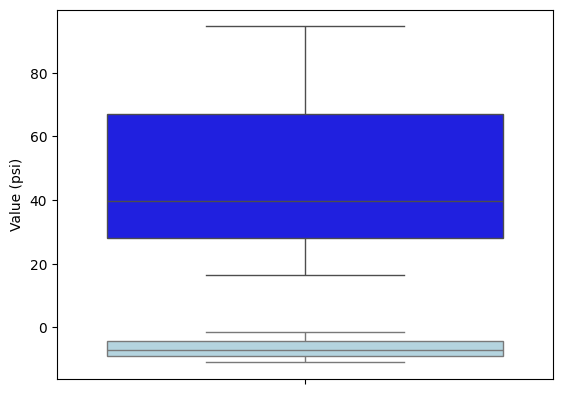

In [26]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -4.46
Value Counts: 417
Values > 100mpg: 93
Values <= 100mpg: 324
Percent above 100mpg: 22.3%
Mean MPG: 58.06
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25            20.2
1        0.50            39.5
2        0.75            94.0
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -10.0
1        0.50         -4.8
2        0.75          0.1


<Axes: ylabel='Value (psi)'>

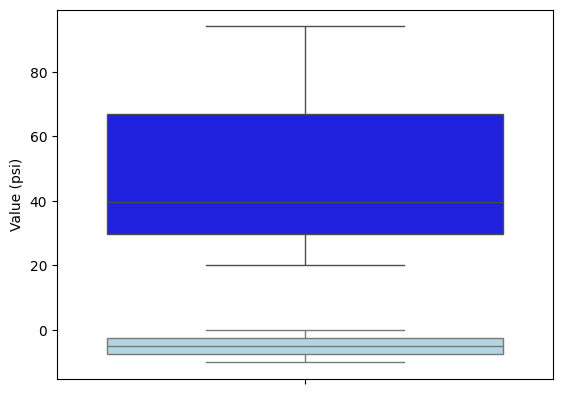

In [27]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -0.71
Value Counts: 682
Values > 100mpg: 62
Values <= 100mpg: 620
Percent above 100mpg: 9.09%
Mean MPG: 36.81
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25          15.000
1        0.50          22.900
2        0.75          42.425
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -4.8
1        0.50         -0.1
2        0.75          3.3


<Axes: ylabel='Value (psi)'>

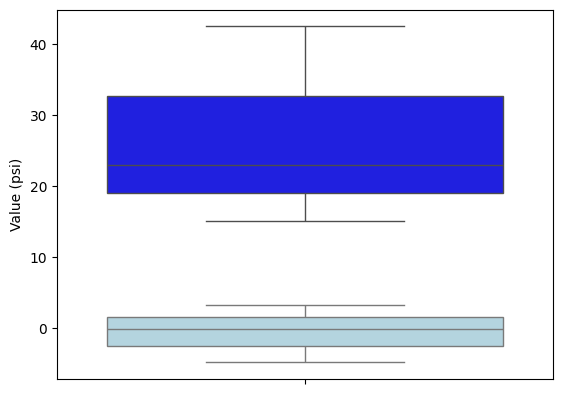

In [28]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -2.5
Value Counts: 36
Values > 100mpg: 2
Values <= 100mpg: 34
Percent above 100mpg: 5.56%
Mean MPG: 43.54
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                    20.375
1        0.50                    37.200
2        0.75                    54.800
Boost Quartiles
   Percentile  Value (psi)
0        0.25       -6.125
1        0.50       -3.400
2        0.75        0.375


<Axes: ylabel='Greater than 70mph (mpg)'>

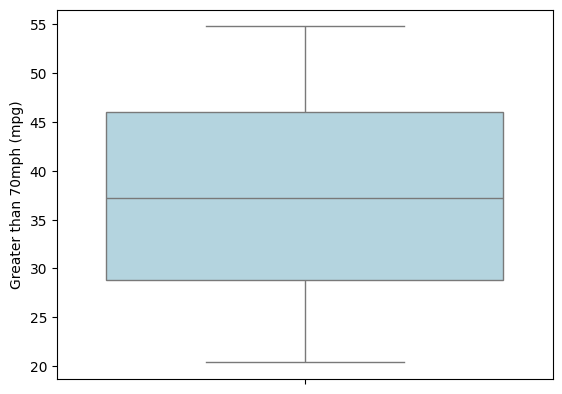

In [29]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [30]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [328, 417, 682, 36]
total mpg <= 100 counts: [252, 324, 620, 34]
total mpg > 100 counts: [76, 93, 62, 2]
% > 100mpg : [23, 22, 9, 5]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,328,252,76,23
50-60mph,417,324,93,22
60-70mph,682,620,62,9
>70mph,36,34,2,5


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25          16.500            20.2          15.000   
1        0.50          39.750            39.5          22.900   
2        0.75          94.525            94.0          42.425   

   Greater than 70mph (mpg)  
0                    20.375  
1                    37.200  
2                    54.800  


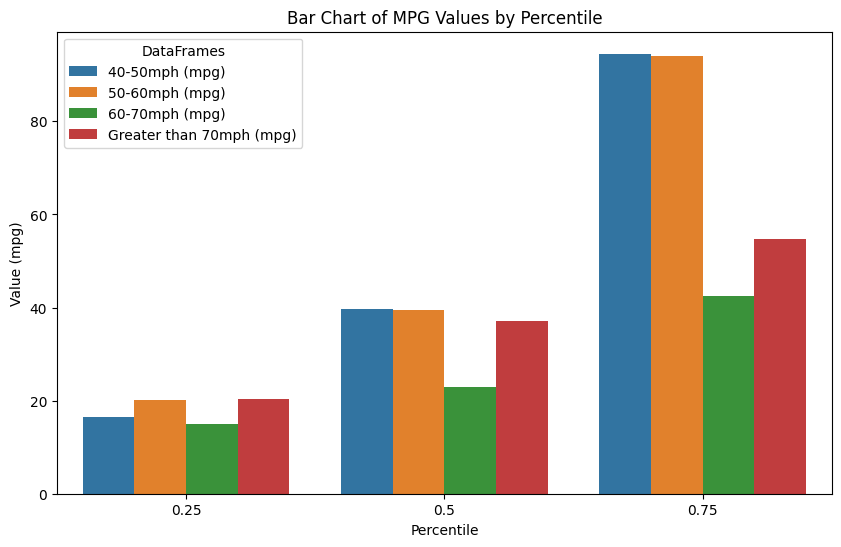

In [31]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [32]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [33]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [34]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [35]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [36]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [37]:
hvexplorer = df.hvplot.explorer()
hvexplorer

BokehModel(combine_events=True, render_bundle={'docs_json': {'54e5cf77-4dd9-4b14-8ad5-60cf82adb75b': {'version…

In [38]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [39]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

      Time (sec)  Trip Distance (miles)  Vehicle speed (MPH)  \
2227    2246.973              19.860022            64.001236   
2228    2247.970              19.871150            65.243970   
2229    2248.972              19.892347            67.108086   
2230    2249.969              19.914549            68.972206   
2231    2250.974              19.925325            68.972206   

      Engine RPM (RPM)  Boost (psi)  Relative accelerator pedal position (%)  \
2227           26.4375     9.282415                                22.745098   
2228           24.5525    11.022868                                23.921568   
2229           25.0100    10.732793                                22.745098   
2230           22.3350     5.221359                                11.764706   
2231           22.0350     6.091585                                10.588235   

      Relative throttle position (%)  Engine Power (hp)  \
2227                       68.627450          11.296539   
2228            

In [40]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [41]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'6817c49d-4543-43c0-80e4-9704e4e738ab': {'version…

In [42]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Mass Air/Boost']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()